In [17]:
import keras
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing import image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Activation
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from PIL import Image
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import seaborn as sn

In [2]:
cur_path = r'C:\Users\hp\Documents\TrafficSign' 

In [3]:
data = []
labels = []
classes = 43
 

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
    
            #data.append(image)
            #labels.append(i)
            data.append([image,i]) #appending all value together 
        except:
            print("Error loading image")

In [4]:
random.shuffle(data)

In [5]:
print(len(data))

39209


In [6]:
x = []
y = []

for features,label in data:
    x.append(features)
    y.append(label)

In [7]:
x = np.array(x)
y = np.array(y)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
X_train = X_train/255.0
X_val = X_val/255.0

In [10]:
print("Shape of train images is:", X_train.shape)
print("Shape of labels is:", y_train.shape)

Shape of train images is: (31367, 30, 30, 3)
Shape of labels is: (31367,)


In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(30, 30, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(43))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
ES = EarlyStopping(monitor='val_accuracy', min_delta=0, verbose=1, restore_best_weights=True, patience=10, mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
MCP = ModelCheckpoint('Best_Model.keras', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')

In [15]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False)

history=model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=15, validation_data=(X_val, y_val),callbacks=[ES, RLP, MCP])


Epoch 1/15


980/981 [============================>.] - ETA: 0s - loss: 2.3274 - accuracy: 0.3162
Epoch 1: val_accuracy improved from -inf to 0.63083, saving model to Best_Model.keras
981/981 [==============================] - 19s 18ms/step - loss: 2.3264 - accuracy: 0.3164 - val_loss: 1.1529 - val_accuracy: 0.6308 - lr: 0.0010
Epoch 2/15
981/981 [==============================] - ETA: 0s - loss: 1.0913 - accuracy: 0.6355
Epoch 2: val_accuracy improved from 0.63083 to 0.87401, saving model to Best_Model.keras
981/981 [==============================] - 17s 18ms/step - loss: 1.0913 - accuracy: 0.6355 - val_loss: 0.4072 - val_accuracy: 0.8740 - lr: 0.0010
Epoch 3/15
981/981 [==============================] - ETA: 0s - loss: 0.6239 - accuracy: 0.7904
Epoch 3: val_accuracy improved from 0.87401 to 0.95142, saving model to Best_Model.keras
981/981 [==============================] - 18s 18ms/step - loss: 0.6239 - accuracy: 0.7904 - val_loss: 0.1665 - val_accuracy: 0.9514 - lr: 0.0010
Epoch 4/

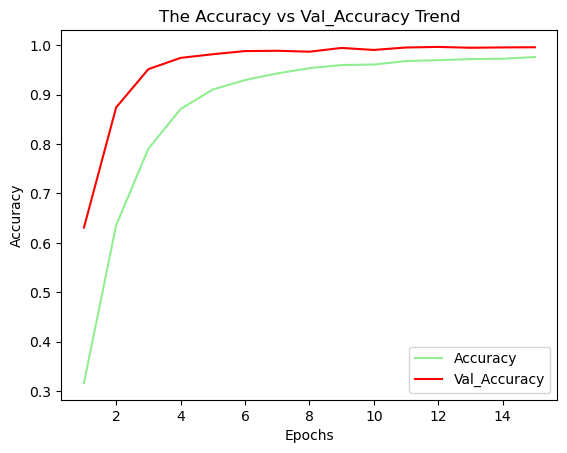

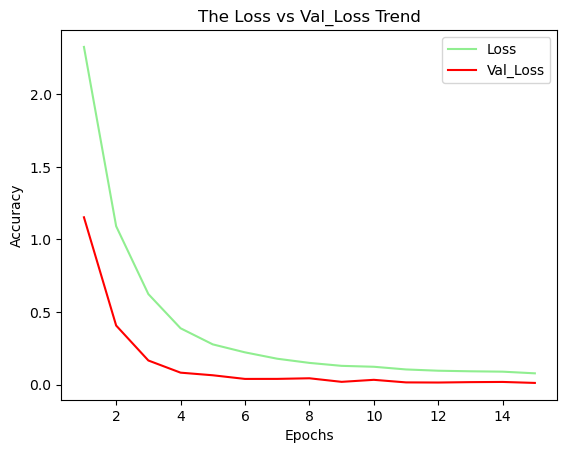

In [18]:
sn.lineplot(x = np.arange(1, len(history.history['accuracy'])+1), y = history.history['accuracy'], color='lightgreen')
sn.lineplot(x = np.arange(1, len(history.history['val_accuracy'])+1), y = history.history['val_accuracy'], color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("The Accuracy vs Val_Accuracy Trend")
plt.legend(labels=['Accuracy', 'Val_Accuracy'])
plt.show()

sn.lineplot(x = np.arange(1, len(history.history['accuracy'])+1), y = history.history['loss'], color='lightgreen')
sn.lineplot(x = np.arange(1, len(history.history['val_accuracy'])+1), y = history.history['val_loss'], color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("The Loss vs Val_Loss Trend")
plt.legend(labels=['Loss', 'Val_Loss'])
plt.show()

In [19]:
loss_score, accuracy_score = model.evaluate(X_val)
predictions = model.predict(X_val)

print(accuracy_score, loss_score)

246/246 [==============================] - 2s 7ms/step
0.0 0.0


In [24]:
path="C:/Users/hp/Documents/TrafficSign/Test/00130.png"

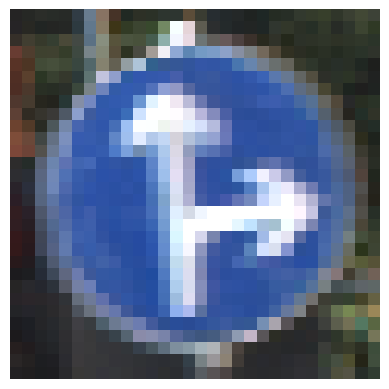

1/1 [==============================] - 0s 23ms/step
Go straight or right


In [25]:
img = image.load_img(path, target_size = (30,30)) #load the image
plt.imshow(img)
plt.axis('off')  # Optional: Turn off the axis
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

value = classes = np.argmax(model.predict(images,batch_size=32),axis=-1) #predict the label for the image

if classes[0]==0:
    print('Speed limit (20km/h)') #print the content

elif classes[0]==1:
    print('Speed limit (30km/h)') #print the content

elif classes[0]==2:
    print('Speed limit (50km/h)') #print the content

elif classes[0]==3:
    print(' Speed limit (60km/h)') #print the content

elif classes[0]==4:
    print('Speed limit (70km/h)') #print the content

elif classes[0]==5:
    print('Speed limit (80km/h)') #print the content

elif classes[0]==6:
    print('End of speed limit (80km/h)') #print the content

elif classes[0]==7:
    print('Speed limit (100km/h)') #print the content

elif classes[0]==8:
    print('Speed limit (120km/h)') #print the content

elif classes[0]==9:
    print('No passing') #print the content

elif classes[0]==10:
    print('No passing veh over 3.5 tons') #print the content 

elif classes[0]==11:
    print(', Right-of-way at intersection') #print the content

elif classes[0]==12:
    print('Priority road') #print the content

elif classes[0]==13:
    print('Yield') #print the content       

elif classes[0]==14:
    print('Stop') #print the content       

elif classes[0]==15:
    print('No vehicles') #print the content

elif classes[0]==16:
    print('Veh > 3.5 tons prohibited') #print the content       

elif classes[0]==17:
    print('No entry') #print the content        

elif classes[0]==18:
    print('General caution') #print the content       

elif classes[0]==19:
    print('Dangerous curve left') #print the content        

elif classes[0]==20:
    print('Dangerous curve right') #print the content        

elif classes[0]==21:
    print('Double curve') #print the content       

elif classes[0]==22:
    print('Bumpy road') #print the content        

elif classes[0]==23:
    print('Slippery road') #print the content        

elif classes[0]==24:
    print('Road narrows on the right') #print the content               

elif classes[0]==25:
    print('Road work') #print the content        

elif classes[0]==26:
    print('Traffic signals') #print the content

elif classes[0]==27:
    print('Pedestrians') #print the content       

elif classes[0]==28:
    print('Children crossing') #print the content

elif classes[0]==29:
    print( 'Bicycles crossing') #print the content

elif classes[0]==30:
    print('Beware of ice/snow') #print the content        

elif classes[0]==31:
    print('Wild animals crossing') #print the content        

elif classes[0]==32:
    print('End speed + passing limits') #print the content        

elif classes[0]==33:
    print('Turn right ahead') #print the content

elif classes[0]==34:
    print('Turn left ahead') #print the content        

elif classes[0]==35:
    print('Ahead only') #print the content        

elif classes[0]==36:
    print('Go straight or right') #print the content

elif classes[0]==37:
    print('Go straight or left') #print the content        

elif classes[0]==38:
    print('Keep right') #print the content

elif classes[0]==39:
    print('Keep left') #print the content       

elif classes[0]==40:
    print('Roundabout mandatory') #print the content

elif classes[0]==41:
    print('End of no passing') #print the content        

else:
    print('End no passing veh > 3.5 tons') #print the content